# CSE-221710309053-Hari Sarmishta

## Question:
* Consider LSTAT (% lower status of the population) as input and build a SLR Model to predict the MEDV
    * Find the correlation by plotting a scatter plot between those two variables and write down the observations like how the variable are related to each other


* Consider  PTRATIO(pupil-teacher ratio by town) as input and build a SLR Model to predict the MEDV
    * Find the correlation by plotting a scatter plot between those two variables and write down the observations like how the variable are related to each other


* Consider AGE(proportion of owner-occupied units built prior to 1940) as input and build a SLR Model to predict the MEDV
    * Find the correlation by plotting a scatter plot between those two variables and write down the observations like how the variable are related to each other
    * Split the dataset into training and testing
Build the model on the training data and check the model’s performance with testing data.

    Find the r2_score for all the models and try to compare the scores, which input is showing more effect on the output variable.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.16.2
0.24.2
0.9.0
3.0.3


In [3]:
from sklearn.datasets import load_boston

In [4]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

In [5]:
boston=load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [11]:
df['MEDV']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


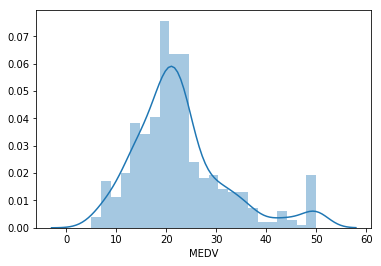

In [14]:
sns.distplot(df.MEDV)

In [15]:
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [16]:
RM_y=df[['MEDV']]
RM_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [17]:
RM_X=df[['RM']]
RM_X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
5,6.430
6,6.012
7,6.172
8,5.631
9,6.004


In [18]:
from sklearn.model_selection import train_test_split
RM_X_train,RM_X_test,RM_y_train,RM_y_test=train_test_split(RM_X,RM_y,test_size=0.2,random_state=2)

In [19]:
print(RM_X_train.shape)
print(RM_y_train.shape)
print(RM_X_test.shape)
print(RM_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm=LinearRegression()

In [22]:
lm.fit(RM_X_train,RM_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
RM_y_pred=lm.predict(RM_X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(RM_y_test,RM_y_pred)

0.6335439948424493

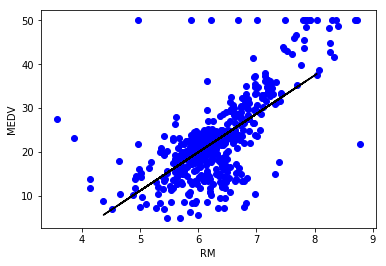

In [26]:
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.scatter(RM_X,RM_y,color="Blue")
plt.plot(RM_X_test,RM_y_pred,color="Black")
plt.show()

#### The r2_score Simple Linear Regression of RM and MEDV is 0.6335439948424493 >5
#### It means RM column shows more effect on MEDV

In [27]:
LSTAT_y=df[['MEDV']]
LSTAT_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [28]:
LSTAT_X=df[['LSTAT']]
LSTAT_X

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
5,5.21
6,12.43
7,19.15
8,29.93
9,17.10


In [29]:
LSTAT_X_train,LSTAT_X_test,LSTAT_y_train,LSTAT_y_test=train_test_split(LSTAT_X,LSTAT_y,test_size=0.2,random_state=2)
print(LSTAT_X_train.shape)
print(LSTAT_y_train.shape)
print(LSTAT_X_test.shape)
print(LSTAT_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [30]:
lm.fit(LSTAT_X_train,LSTAT_y_train)
LSTAT_y_pred=lm.predict(LSTAT_X_test)
r2_score(LSTAT_y_test,LSTAT_y_pred)

0.6029904192340267

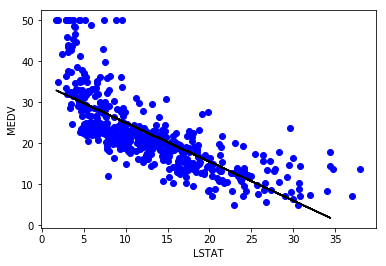

In [31]:
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.scatter(LSTAT_X,LSTAT_y,color="Blue")
plt.plot(LSTAT_X_test,LSTAT_y_pred,color="Black")
plt.show()

#### The r2_score Simple Linear Regression of LSTAT and MEDV is 0.6029904192340267 >5
#### It means LSTAT column shows more effect on MEDV

In [32]:
PTRATIO_y=df[['MEDV']]
PTRATIO_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [33]:
PTRATIO_X=df[['PTRATIO']]
PTRATIO_X

,PTRATIO
0,15.3
1,17.8
2,17.8
3,18.7
4,18.7
5,18.7
6,15.2
7,15.2
8,15.2
9,15.2


In [34]:
PTRATIO_X_train,PTRATIO_X_test,PTRATIO_y_train,PTRATIO_y_test=train_test_split(PTRATIO_X,PTRATIO_y,
                                                                               test_size=0.2,random_state=2)

print(PTRATIO_X_train.shape)
print(PTRATIO_y_train.shape)
print(PTRATIO_X_test.shape)
print(PTRATIO_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [35]:
lm.fit(PTRATIO_X_train,PTRATIO_y_train)

PTRATIO_y_pred=lm.predict(PTRATIO_X_test)

r2_score(PTRATIO_y_test,PTRATIO_y_pred)

0.37344768520359994

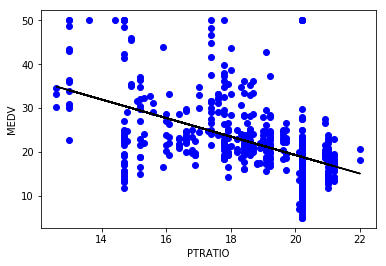

In [36]:
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")
plt.scatter(PTRATIO_X,PTRATIO_y,color="Blue")
plt.plot(PTRATIO_X_test,PTRATIO_y_pred,color="Black")
plt.show()

#### The r2_score Simple Linear Regression of PTRATIO and MEDV is 0.37344768520359994 <5
#### It means PTRATIO column shows less effect on MEDV

In [37]:
AGE_y=df[['MEDV']]
AGE_y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [38]:
AGE_X=df[['AGE']]
AGE_X

,AGE
0,65.2
1,78.9
2,61.1
3,45.8
4,54.2
5,58.7
6,66.6
7,96.1
8,100.0
9,85.9


In [39]:
AGE_X_train,AGE_X_test,AGE_y_train,AGE_y_test=train_test_split(AGE_X,AGE_y,test_size=0.2,random_state=2)
print(AGE_X_train.shape)
print(AGE_y_train.shape)
print(AGE_X_test.shape)
print(AGE_y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


In [40]:
lm.fit(AGE_X_train,AGE_y_train)
AGE_y_pred=lm.predict(AGE_X_test)
r2_score(AGE_y_test,AGE_y_pred)

0.2165852194670006

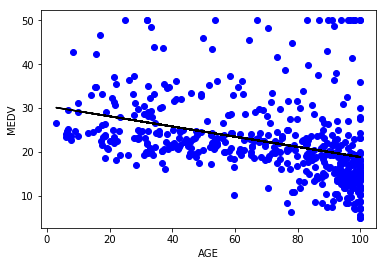

In [41]:
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.scatter(AGE_X,AGE_y,color="Blue")
plt.plot(AGE_X_test,AGE_y_pred,color="Black")
plt.show()

#### The r2_score Simple Linear Regression of AGE and MEDV is 0.2165852194670006 <5
#### It means AGE column shows less effect on MEDV

#### RM shows High effect on MEDV
#### LSTAT shows Mid-High effect on MEDV
#### PTRATIO shows Mid effect on MEDV
#### AGE shows Low effect on MEDV